In [2]:
import os

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from pyvi import ViTokenizer

from config import VA_DATA
from utils import tsne

In [3]:
""" LOAD DATA """

FILE_NAME = "toppy"
FILE_EXTENSION = "xlsx"
FILE = ".".join([FILE_NAME, FILE_EXTENSION])

DATA_PATH = os.path.join(VA_DATA, FILE)
print(f"DATA PATH: {DATA_PATH}", end="\n\n")

data_df = pd.read_excel(DATA_PATH)
display(data_df.head())

DATA PATH: data/va/toppy.xlsx



,No.,Sample,Intent,Entity,Notes
0,1,không quan tâm,van_tu_choi,NaN,NaN
1,2,khỏi nha,van_tu_choi,NaN,NaN
2,3,phiền quá,van_tu_choi,NaN,NaN
3,4,đã bảo không cần rồi,van_tu_choi,NaN,NaN
4,5,con chị không học trực tuyến,van_tu_choi,NaN,NaN


In [4]:
X = data_df["Sample"]
y = data_df["Intent"]
print(f"# samples: {len(X)}")

# samples: 278


In [5]:
""" Text Tokenization """
X = [ViTokenizer.tokenize(x) for x in X]

In [6]:
""" TF-IDF Vectorization """
tfidf = TfidfVectorizer()
doc_term_matrix = tfidf.fit_transform(X)
doc_term_matrix.shape

(278, 164)

/home/emandai/.pyenv/versions/3.7.9/envs/intent-detection/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/emandai/.pyenv/versions/3.7.9/envs/intent-detection/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/home/emandai/.pyenv/versions/3.7.9/envs/intent-detection/lib/python3.7/site-packages/matplotlib/collections.py:1097: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "
/home/emandai/workspace/vnlp/Research/Intent-Detection/utils.py:70: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  title=title)


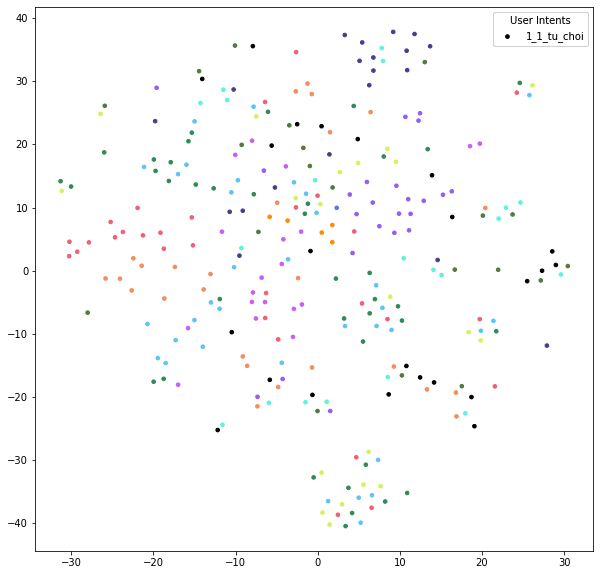

In [7]:
tsne(doc_term_matrix, y.tolist(), title="User Intents", figsize=(10, 10))